In [57]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE, r2_score
import pickle #模型封装
import xgboost as xgb
import pandas as pd # 基础的运算库，必备，下同
import numpy as np
from sklearn.preprocessing import StandardScaler # 数据标准化 均值为0，方差为1的正态分布
from sklearn.impute import SimpleImputer # 数据去零补缺

from sklearn.model_selection import KFold, cross_val_score as CVS
import matplotlib.pyplot as plt 
from time import time
import datetime
from xgboost import XGBRegressor as XGBR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR

In [76]:
# 训练数据输入
Data = pd.read_csv(r"F:\lastpaper\data\L8_20191105_docCDOM_2.csv"
                   , index_col = 0
                  )

X = Data.iloc[:,2:9]
X.rename(columns={'b1_L8_9111':'0'
                 ,"b2_L8_9111":'1'
                 ,"b3_L8_9111":'2'
                 ,"b4_L8_9111":'3'
                 ,"b5_L8_9111":'4'
                 ,"b6_L8_9111":'5'
                 ,"b7_L8_9111":'6'
                 },inplace=True)
#     X = np.array(X)
#     for col in range(X.shape[1]):
#         median=np.median(X[:,col])
#         for row in range(X.shape[0]):
#             if X[row,col] <= 0:
#                 X[row,col] = median
#     scaler = StandardScaler() # 标准化
#     X = scaler.fit_transform(X)

Y = Data.iloc[:,0]
Xtrain,Xtest,Ytrain,Ytest = TTS(X,Y,test_size=0.3,random_state=40)

In [78]:
## 模型封装


import pickle
from sklearn.linear_model import LinearRegression as LR

bst = LR().fit(Xtrain,Ytrain)

#保存模型
pickle.dump(bst, open("LR_cdom.dat","wb"))
#注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件，当我们希望导入的不是文本文件，而
#是模型本身的时候，我们使用"wb"和"rb"作为读取的模式。其中wb表示以二进制写入，rb表示以二进制读入
# 导出模型
#loaded_model = pickle.load(open("LR_cdom.dat", "rb"))

In [71]:
from time import time
import datetime

time0 = time()
reg = LR().fit(Xtrain, Ytrain)

time= datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f") #计算时间戳并转换为时分秒
ypreds = reg.predict(Xtest)
yprods = reg.predict(Xtrain)

from sklearn.metrics import mean_squared_error as MSE,r2_score
test_mse=MSE(Ytest,ypreds)
test_r2 = r2_score(Ytest,ypreds)
fit_r2 = r2_score(Ytrain,yprods)
fit_mse = MSE(Ytrain,yprods)
prams= [['Fittime','FitMSE','FitR2','TestMSE','TestR2'],
        [time,fit_mse,fit_r2,test_mse,test_r2]]
pd.DataFrame(prams)


,0,1,2,3,4
0,Fittime,FitMSE,FitR2,TestMSE,TestR2
1,00:00:000998,0.442559,0.580479,0.313215,0.650902


In [79]:
# coding=UTF-8
import xlrd
import xlwt

def write_excel_xls(path, sheet_name, value):
    workbook = xlwt.Workbook()  # 新建一个工作簿
    for k in range(len(value)):
        index = len(value[k])  # 获取需要写入数据的行数
        data = value[k]
        name = sheet_name[k]
        sheet = workbook.add_sheet(name)  # 在工作簿中新建一个表格
        for i in range(0, index):
            for j in range(0, len(data[i])):
                sheet.write(i, j, str(data[i][j]))  # 像表格中写入数据（对应的行和列）
    workbook.save(path)  # 保存工作簿
    print("xls格式表格写入数据成功！")

book_name_xls = 'LR.xls'
 
sheet_name_xls = ['prams','testdata','traindata']
 
value = [[prams],[Ytest,ypreds],[Ytrain,yprods]]
 
write_excel_xls(book_name_xls,sheet_name_xls,value)

xls格式表格写入数据成功！


In [9]:
# 查看线性回归参数
reg.coef_ # 回归系数
[*zip(Xtrain.columns,reg.coef_)] # 使用哑变量方式打开

reg.intercept_ # 回归方程截距

C:\Users\RSof4\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


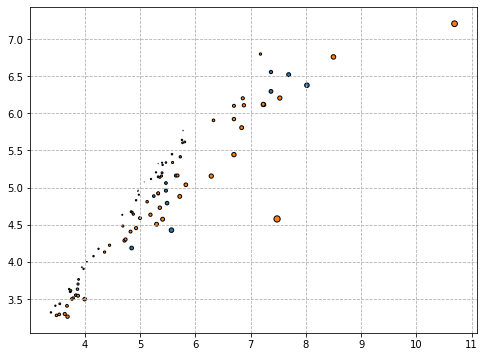

In [26]:
plt.figure(figsize=(8,6))

plt.scatter(Ytest,yhat,marker='o',
            s=(Ytest-yhat)/Ytest*100,
            cmap='Reds',
            #c=y,
            edgecolor='black')
plt.scatter(Ytrain,reg.predict(Xtrain),marker='o',
            s=(Ytrain-reg.predict(Xtrain))/Ytrain*100,
            cmap='yellows',
            #c=y,
            edgecolor='black')
plt.grid(True, linestyle='--')
# s：散点的大小
# c：散点的颜色
# vmin,vmax：亮度设置，标量
# cmap：colormap